(270, 64)
(90, 64)
[1. 1. 1. 1. 1.]
Test set accuracy with Logistic Regression: 1.00


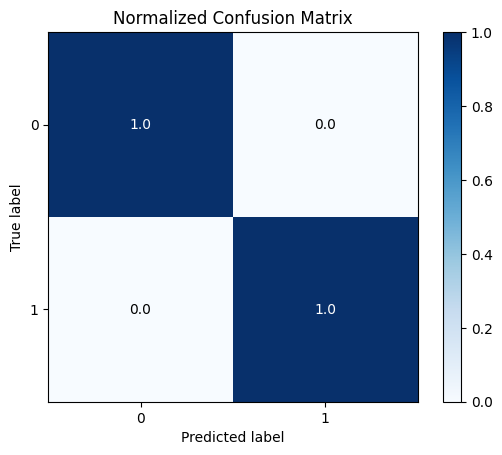

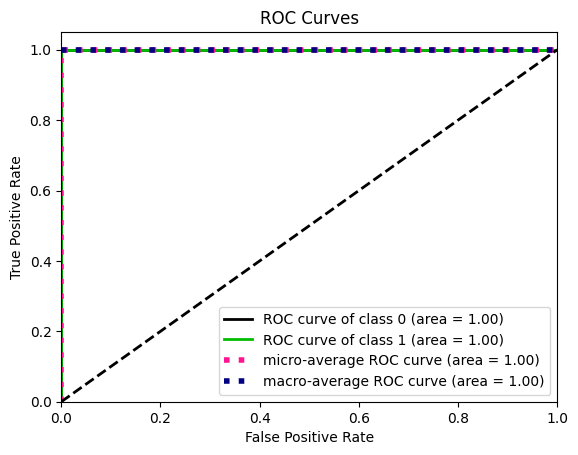

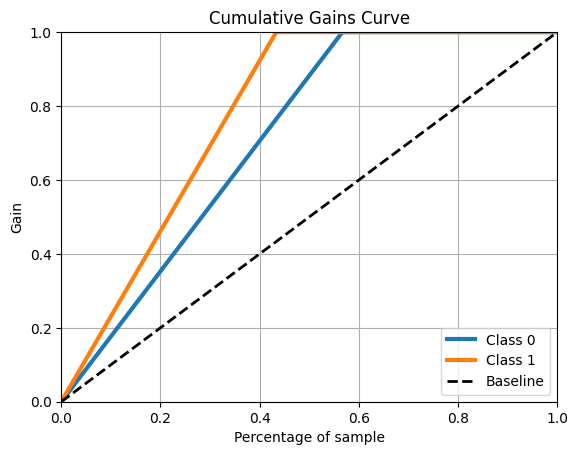

In [23]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
# from sklearn.datasets import fill in the data set
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
import scipy
scipy.interp = np.interp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
def RunExperiment(X,Y, n_classes):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    print(X_train.shape)
    print(X_test.shape)
    # Logistic Regression
    # define which type of problem, binary or multiclass
    logreg = LogisticRegression(solver='lbfgs')
    logreg.fit(X_train, y_train)
    #Cross validation
    accuracy = cross_validate(logreg,X_test,y_test,cv=5)['test_score']
    print(accuracy)
    print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))
    
    y_pred = logreg.predict(X_test)
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
    plt.show()
    y_probas = logreg.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas)
    plt.show()
    if n_classes == 2: 
        skplt.metrics.plot_cumulative_gain(y_test, y_probas)
        plt.show()
    
digits = load_digits(n_class=2)
X, Y= digits.data, digits.target

RunExperiment(X,Y,n_classes=2)

(112, 4)
(38, 4)
[1.         0.875      0.75       0.85714286 0.85714286]
Test set accuracy with Logistic Regression: 0.97


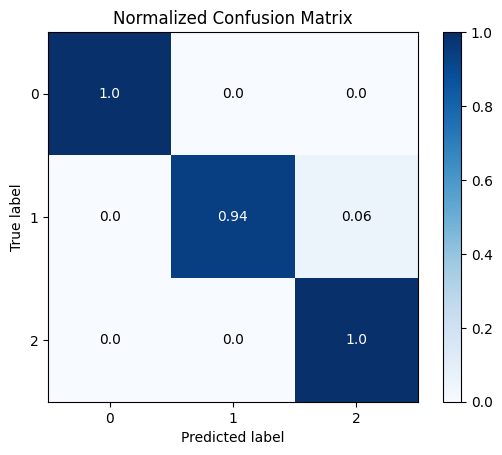

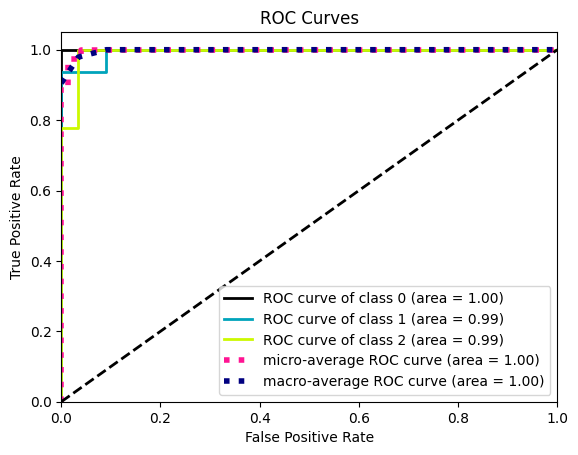

In [24]:
#C)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
Y = iris.target # Target labels
RunExperiment(X,Y, n_classes=3)